In [17]:
import pandas as pd
import scripts.sentiment_strategy as ss

In [18]:
ticker = "AAPL"
name = "Apple Inc."
upper_threshold = 0.1
lower_threshold = -0.05

In [19]:
df_scored = pd.read_csv("data/AAPL_sentiment_rag.csv")

df_scored = ss.parse_date_raw_column(
    df_scored,
    date_col="date_raw",
    default_year=2025,
    out_col="date",
)

In [20]:
df_scored.head()    

,title,date_raw,source_code,body,sentiment,sentiment_score,sentiment_confidence,sentiment_rationale,sentiment_raw,date
0,Citigroup Adjusts Price Target on Apple to $33...,Dec. 09,MT,Citigroup Adjusts Price Target on Apple to $33...,bullish,0.85,0.90,The headline explicitly states a price target ...,"```json\n{\n ""sentiment"": ""bullish"",\n ""scor...",2025-12-09
1,Apple AI Strategy Finally Taking Shape Amid Ke...,Dec. 08,MT,Apple AI Strategy Finally Taking Shape Amid Ke...,bullish,0.85,0.95,"The mention of a 'new era' of growth, a key hi...","```json\n{\n ""sentiment"": ""bullish"",\n ""scor...",2025-12-08
2,Wedbush Ups PT on Apple to $350 From $320 on '...,Dec. 08,MT,Wedbush Ups PT on Apple to $350 From $320 on '...,bullish,0.85,0.95,The headline highlights strong iPhone sales an...,"```json\n{\n ""sentiment"": ""bullish"",\n ""scor...",2025-12-08
3,MoffettNathanson Adjusts Price Target on Apple...,Dec. 03,MT,MoffettNathanson Adjusts Price Target on Apple...,bullish,0.75,0.90,The headline indicates a revised price target ...,"```json\n{\n ""sentiment"": ""bullish"",\n ""scor...",2025-12-03
4,Loop Capital Adjusts Price Target on Apple to ...,Dec. 02,MT,Loop Capital Adjusts Price Target on Apple to ...,bullish,0.85,0.90,The headline indicates a positive adjustment t...,"```json\n{\n ""sentiment"": ""bullish"",\n ""scor...",2025-12-02


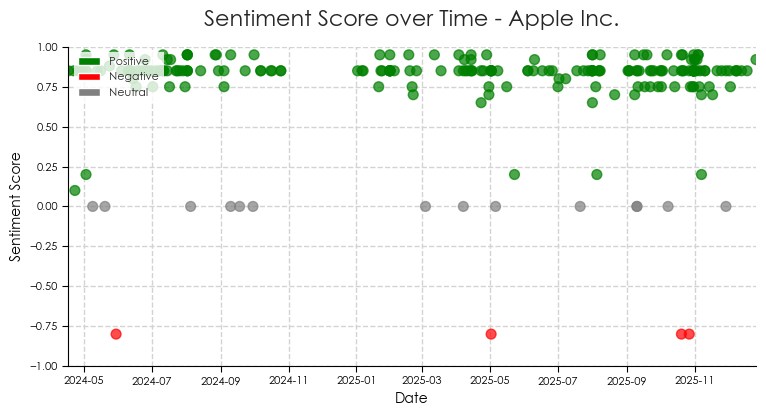

In [21]:
ss.plot_sentiment_score_over_time(df_scored, name, upper_threshold=upper_threshold, lower_threshold=lower_threshold)

In [22]:
daily_sent = ss.build_daily_sentiment(
    df_scored,
    date_col="date",
    score_col="sentiment_score",
    agg="mean",
)

last_date = df_scored['date'].max()
first_date = df_scored['date'].min()
signal_df = ss.build_trading_signal_from_sentiment(daily_sent, long_threshold=upper_threshold, short_threshold=lower_threshold)

price_df = ss.download_price_data(ticker, start=first_date.strftime("%Y-%m-%d"), end=last_date.strftime("%Y-%m-%d"))

bt_df = ss.backtest_sentiment_strategy(price_df, signal_df, cost_bps=1.0, price_col="Close")

[*********************100%***********************]  1 of 1 completed


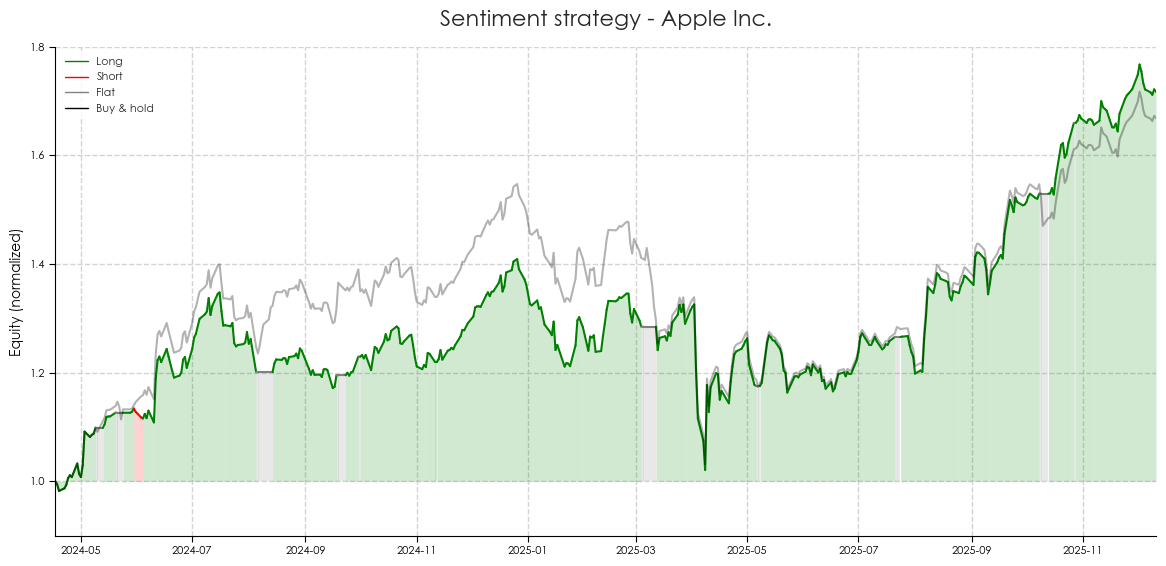

In [23]:
ss.plot_equity_colored_by_position(bt_df, name)